# Посмотрим на срез по международной торговле технологиями за 2015 (?) год среди стран ОЭСР, некоторых других стран (?) и России.

**Вопросы:**  
1.Зачем в выборке Тайвань и Сингапур? 
- Это "Азиатские тигры", но без Гонконга (как даже как SAR Китая), а Ю. Корея входит и в ОЭСР ?

Распарсим выборку из экселя

In [1]:
data = '''Страна	Поступления от экспорта технологий, млрд. USD	Выплаты по импорту технологий, млрд. USD
Россия	1,7	2,2
США	130,8	88,9
Ирландия	73,3	98,1
Германия	71,8	53,7
Нидерланды	56,3	50,2
Великобритания	41,1	21,3
Япония	32,6	5,0
Швейцария	30,3	34,0
Швеция	28,0	15,8
Бельгия	17,8	17,5
Испания	17,1	10,1
Израиль	15,4	3,5
Италия	13,2	12,0
Австрия	11,3	7,1
Финляндия	10,8	5,0
Южная Корея	10,4	16,4
Дания	7,7	6,0
Сингапур	5,9	17,1
Франция	5,2	3,2
Люксембург	5,0	6,0
Польша	4,9	3,1
Норвегия	4,5	2,9
Австралия	4,4	7,8
Венгрия	4,1	3,8
Чехия	3,7	2,4
Канада	2,6	1,2
Португалия	1,8	1,7
Тайвань	1,1	5,4'''

Распарсим страны-участники ОЭСР

In [2]:
oecd_countries = '''Австралия (дата вступления - 7 июня 1971)
Австрия (30 сентября 1961)
Бельгия (30 сентября 1961) 
Великобритания (30 сентября 1961)
Венгрия (7 мая 1996)
Германия (30 сентября 1961)
Греция (30 сентября 1961)
Дания (30 сентября 1961)
Израиль (7 сентября 2010)
Ирландия (30 сентября 1961) 
Исландия (30 сентября 1961)
Испания (30 сентября 1961) 
Италия (30 сентября 1961) 
Канада (30 сентября 1961)
Латвия (1 июля 2016)
Литва (5 июля 2018)
Люксембург (30 сентября 1961) 
Мексика (18 мая 1994)
Нидерланды (30 сентября 1961) 
Новая Зеландия (29 мая 1973)
Норвегия (30 сентября 1961)
Польша (22 мая 1996)
Португалия (30 сентября 1961) 
Словакия (14 декабря 2000)
Словения (21 июля 2010)
США (30 сентября 1961)
Турция (30 сентября 1961)
Финляндия (28 января 1969)
Франция (30 сентября 1961) 
Чехия (21 декабря 1995)
Чили (7 мая 2010)
Швейцария (30 сентября 1961) 
Швеция (30 сентября 1961) 
Эстония (3 июня 2010)
Южная Корея (12 декабря 1996)
Япония (28 апреля 1964)'''

In [3]:
import string
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')

In [4]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


In [5]:
oecd_countries_mod = re.sub(' \(.*\)*', '', oecd_countries).split('\n')

In [6]:
data_mod = data.split('\n')
data_mod = [row.split('\t') for row in data_mod]

Посмотрим на выборку стран в "табличке"

In [10]:
df = pd.DataFrame(data=data_mod[1:], columns=data_mod[0])
df['Поступления от экспорта технологий, млрд. USD'] = df['Поступления от экспорта технологий, млрд. USD'].str.replace(',', '.').astype(float)
df['Выплаты по импорту технологий, млрд. USD'] = df['Выплаты по импорту технологий, млрд. USD'].str.replace(',', '.').astype(float)
df.head()

,Страна,"Поступления от экспорта технологий, млрд. USD","Выплаты по импорту технологий, млрд. USD"
0,Россия,1.7,2.2
1,США,130.8,88.9
2,Ирландия,73.3,98.1
3,Германия,71.8,53.7
4,Нидерланды,56.3,50.2


Преобразуем табличку немного: Добавим отдельный признк Organisation: категорию OECD/not OECD. Посмотрим на страны в выборке, которые не состояет в OECD (Россия, Сингапур, Тайвань)

In [11]:
%%time
wrong = []
df['Organisation'] = np.NAN
for indx, country in df['Страна'].iteritems():
    if country in oecd_countries_mod:
        df.loc[indx, 'Organisation'] = 'OECD'
    else:
        wrong.append(country)
        df.loc[indx, 'Organisation'] = 'not OECD'
display(df.head())
display(wrong)

,Страна,"Поступления от экспорта технологий, млрд. USD","Выплаты по импорту технологий, млрд. USD",Organisation
0,Россия,1.7,2.2,not OECD
1,США,130.8,88.9,OECD
2,Ирландия,73.3,98.1,OECD
3,Германия,71.8,53.7,OECD
4,Нидерланды,56.3,50.2,OECD


['Россия', 'Сингапур', 'Тайвань']

Wall time: 24 ms


In [12]:
df = df[(df['Organisation'] == 'OECD') | (df['Страна'] == 'Россия')]

Создадим новый столбик товарооборот, равный сумме экспорта и импорта.

In [13]:
df['Товарооборот, млрд. USD'] = df['Поступления от экспорта технологий, млрд. USD'] \
+ df['Выплаты по импорту технологий, млрд. USD']
df['Товарооборот, млрд. USD'] = df['Товарооборот, млрд. USD'].round(2)
df.head()

,Страна,"Поступления от экспорта технологий, млрд. USD","Выплаты по импорту технологий, млрд. USD",Organisation,"Товарооборот, млрд. USD"
0,Россия,1.7,2.2,not OECD,3.9
1,США,130.8,88.9,OECD,219.7
2,Ирландия,73.3,98.1,OECD,171.4
3,Германия,71.8,53.7,OECD,125.5
4,Нидерланды,56.3,50.2,OECD,106.5


И отсортируем страны по товарообороту.

In [14]:
df.loc[1:, :] = df.loc[1:, :].sort_values(by='Товарооборот, млрд. USD', ascending=False)
df_sorted_all = df.sort_values(by='Товарооборот, млрд. USD', ascending=False)
display(df.head(11))
display(df_sorted_all)

,Страна,"Поступления от экспорта технологий, млрд. USD","Выплаты по импорту технологий, млрд. USD",Organisation,"Товарооборот, млрд. USD"
0,Россия,1.7,2.2,not OECD,3.9
1,США,130.8,88.9,OECD,219.7
2,Ирландия,73.3,98.1,OECD,171.4
3,Германия,71.8,53.7,OECD,125.5
4,Нидерланды,56.3,50.2,OECD,106.5
5,Великобритания,41.1,21.3,OECD,62.4
6,Япония,32.6,5.0,OECD,37.6
7,Швейцария,30.3,34.0,OECD,64.3
8,Швеция,28.0,15.8,OECD,43.8
9,Бельгия,17.8,17.5,OECD,35.3


,Страна,"Поступления от экспорта технологий, млрд. USD","Выплаты по импорту технологий, млрд. USD",Organisation,"Товарооборот, млрд. USD"
1,США,130.8,88.9,OECD,219.7
2,Ирландия,73.3,98.1,OECD,171.4
3,Германия,71.8,53.7,OECD,125.5
4,Нидерланды,56.3,50.2,OECD,106.5
7,Швейцария,30.3,34.0,OECD,64.3
5,Великобритания,41.1,21.3,OECD,62.4
8,Швеция,28.0,15.8,OECD,43.8
6,Япония,32.6,5.0,OECD,37.6
9,Бельгия,17.8,17.5,OECD,35.3
10,Испания,17.1,10.1,OECD,27.2


## Визуализации

Посмотрим: что как представляются эти данные простой столбчатой диаграммой на таком делении?  
**Ответ:** плохо, 
- а) из-за разницы масштаба;
- б) из-за количества стран;  
**Решения: **
- а) можно изменить масштаб шкалы (но log шкала и сравнение порядков часто не интерпретируемы людьми);
- б) можно изменить график (например, сделать treemap);
- с) можно изменить структуру и иерархию графика (например, разделить текущую структуру на еще несколько: страны западной/центральной/восточной/южной европы);

## Построим barplot

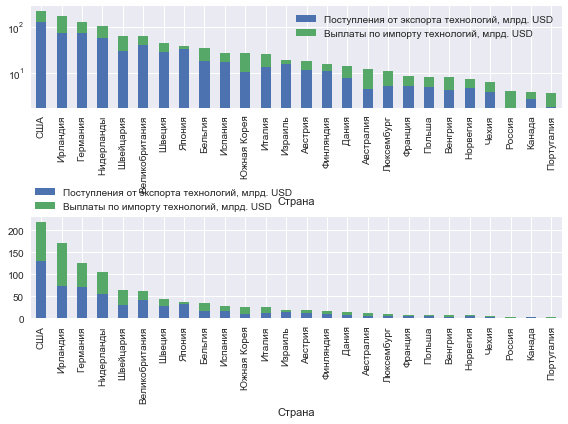

In [17]:
fig, ax1 = plt.subplots(nrows=2)

df_sorted_all[['Страна', 'Поступления от экспорта технологий, млрд. USD',
               'Выплаты по импорту технологий, млрд. USD']].plot(ax=ax1[0],
                                                x='Страна',
                                                kind='bar', 
                                                stacked=True, 
                                                legend=True,
                                                figsize=(8, 6),
#                                               subplots=True,
                                                logy=True,
#                                               secondary_y=True
                                                                )

df_sorted_all[['Страна', 'Поступления от экспорта технологий, млрд. USD',
               'Выплаты по импорту технологий, млрд. USD']].plot(ax=ax1[1],
                                                x='Страна',
                                                kind='bar', 
                                                stacked=True, 
                                                legend=True,
                                                figsize=(8, 6),
#                                               subplots=True,
#                                                 logy=True,
#                                               secondary_y=True
                                                                )


plt.legend(
           bbox_to_anchor=(0., 1.02, 1., -.102),  
           mode="expand", 
           borderaxespad=0.)
# plt.yscale('log')
plt.tight_layout()
plt.show()

## Построим treemap

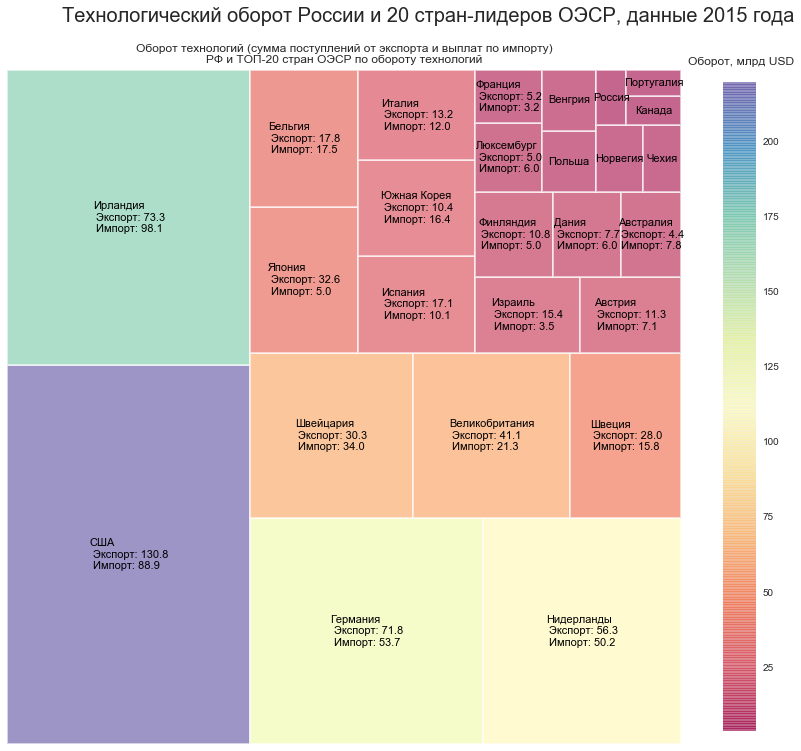

In [18]:
import matplotlib
import squarify # pip install squarify (algorithm for treemap)

mini = df_sorted_all['Товарооборот, млрд. USD'].min() 
maxi = df_sorted_all['Товарооборот, млрд. USD'].max()
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
cmap = matplotlib.cm.Spectral
colors = [cmap(norm(value)) for value in df_sorted_all['Товарооборот, млрд. USD']]
# colors[-3] = "#FBFCFE"
# colors = list(reversed(colors))

labels= (df_sorted_all['Страна'] +
#          '\nОборот: ' + df_sorted_all['Товарооборот, млрд. USD'].apply(str) +
         '\nЭкспорт: ' + df_sorted_all['Поступления от экспорта технологий, млрд. USD'].apply(str) +
         '\nИмпорт: ' + df_sorted_all['Выплаты по импорту технологий, млрд. USD'].apply(str)
        )
labels.loc[20:] = df_sorted_all['Страна']
# labels = df_sorted_all['Страна']

# Change color
fig = plt.figure(figsize=(12, 10))
fig.suptitle("Технологический оборот России и 20 стран-лидеров ОЭСР, данные 2015 года", y=1.04, fontsize=20)
ax = fig.add_subplot(111, aspect="equal")
ax = squarify.plot(sizes=df_sorted_all['Товарооборот, млрд. USD'], 
              label=labels, 
              color=colors,
              linewidth=2, 
              edgecolor="#ffffff",
              alpha=.6,
              text_kwargs={
                          'color':'black', 
#                            'alpha':0.86,
                           'fontsize':11,
                           'rotation':0,
#                            'family':'sans-serif',
#                            'weight':'bold',
                           'multialignment':'left'
                          }
                  )
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("""Оборот технологий (сумма поступлений от экспорта и выплат по импорту)
РФ и ТОП-20 стран ОЭСР по обороту технологий""", y=1.001, fontsize=12)

# color bar
# create dummy invisible image with a color map
img = plt.imshow(X=[np.exp(df_sorted_all['Товарооборот, млрд. USD'])],
                 norm=norm, 
                 cmap=cmap, 
                 alpha=.6)
img.set_visible(False)
fig.colorbar(img, orientation="vertical", shrink=0.96)
fig.text(x=0.80, y=0.96, s="Оборот, млрд USD", fontsize=12)

# plt.savefig('технологический_оборот_.png', dpi=600, 
# #             facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
# #         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None, metadata=None)
plt.axis('off')
plt.tight_layout()
plt.show()

### Как можно улучшить treemap?

**Что сложно сделать технически, но, возможно, сможет сделать дизайнер:**

1. Разделение блока страны на EXP и IMP
2. Использовать оси (сейчас они не используются) и передать с их помощью экспорт и импорт, делая блоки стран разного размера

<a href="http://www.freeimagehosting.net/commercial-photography/"><img src="https://i.imgur.com/dUmQFaU.png" alt="Commercial Photography"></a>

**Как хотелось бы?**
[Раздел high tech companies](https://www.bloomberg.com/graphics/2015-innovative-countries/)

**Что не получилось:**  
- Можно уменьшить количество стран (не стоит так делать, в сборнике прошлого года была 21 страна). Возможно, есть другие иерархии и разделения.
- Можно изменить шкалы (все эксперименты с нормализацией цветов и товарооборота, были неудачные и страдала или читаемость, или интерпретируемость)